In [3]:
from urllib.request import urlretrieve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### Business problem description:

What exactly is Customer Churn? It is when an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with a company. It can be defined in a variety of ways.

1. Contractual churn, or when a customer is under contract for a service and decides to cancel their service. This can be found in Cable TV, and SaaS products.

2. Voluntary churn is when a user voluntarily cancels a service and includes Prepaid Cell Phones, Streaming Subsriptions.

3. Non-Contractual or when a customer is not under contract for a service is the next example of churn, and includes consumer loyalty at a retail location or online browsing.

4. Finally, involuntary churn, or when a churn occurs not at the request of the customer and includes, credit card expiration, or utilties being shut off by the provider.

Here, churn is defined by the customer cancelling their cellular plan at a given point in time and is encoded in the dataset as no / yes. The aim of this project is to preprocess and analyze a real-world cellular servise usage dataset to evaluate which variables are biggest drivers for customer churn, then create, evaluate and tune classification models that will be able to predict potential churn efficiently based on users' activity.

In [4]:
df = pd.read_csv('datasets/Churn.csv')

In [5]:
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


### Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [7]:
df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [8]:
df['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

###### Looks like there are more churners than non-churners in the dataset

In [9]:
print(df.groupby(['Churn']).std())

       Account_Length  Vmail_Message   Day_Mins   Eve_Mins  Night_Mins  \
Churn                                                                    
no           39.88235      13.913125  50.181655  50.292175   51.105032   
yes          39.46782      11.860138  68.997792  51.728910   47.132825   

       Intl_Mins  CustServ_Calls  Day_Calls  Day_Charge  Eve_Calls  \
Churn                                                                
no      2.784489        1.163883  19.801157    8.530835  19.958414   
yes     2.793190        1.853275  21.582307   11.729710  19.724711   

       Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  \
Churn                                                                   
no       4.274863    19.506246      2.299768    2.441984     0.751784   
yes      4.396762    19.950659      2.121081    2.551575     0.754152   

       Area_Code  
Churn             
no     42.306156  
yes    42.792270  


##### Rather unsurprisingly, churners seem to make more customer service calls than non-churners.

When dealing with customer data, geographic regions may play an important part in determining whether a customer will cancel their service or not. Let's group 'State' and 'Churn' to count the number of churners and non-churners by state. 

In [10]:
print(df.groupby('State')['Churn'].value_counts())

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64


##### Seems like although California is the most populous state in the U.S, there are not as many customers from California in the dataset. Arizona (AZ), for example, has 64 customers, 4 of whom ended up churning. In comparison, California has a higher number (and percentage) of customers who churned. 

Let's now visualze a distribution of account length feature and see whether it varies among churner as opposed to non-churners

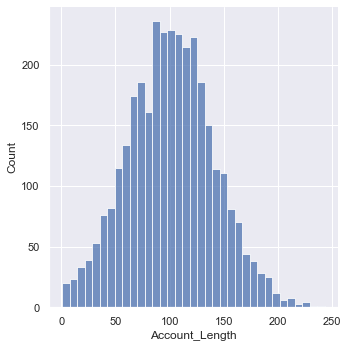

In [11]:
sns.displot(df['Account_Length'], kde_kws=dict(bw=0.5))
plt.show()

##### The variable seems to be normally distributed, let's now see differences in account length between churners and non-churners 

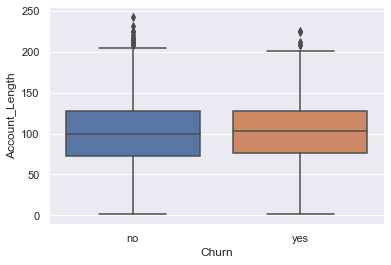

In [12]:
sns.boxplot(x = 'Churn',
           y = 'Account_Length',
           data = df)
plt.show()

### Without outliers:

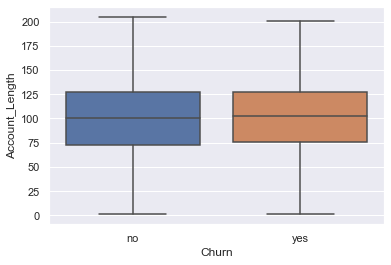

In [13]:
sns.boxplot(x = 'Churn',
           y = 'Account_Length',
           data = df,
           sym = "")
plt.show()

#### It seems like, as far as predicting churn goes, account length does not really matter.

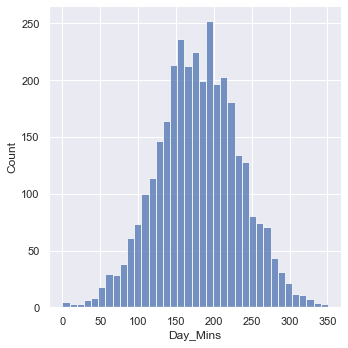

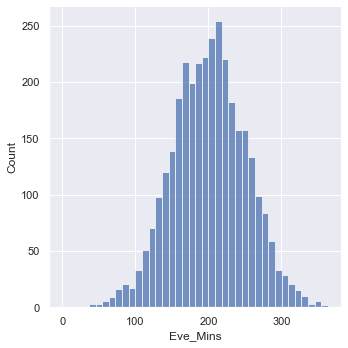

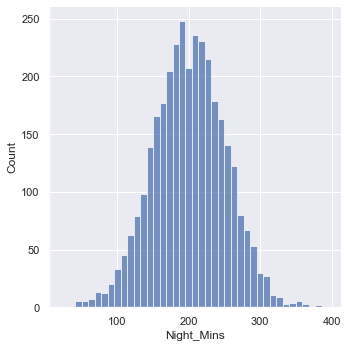

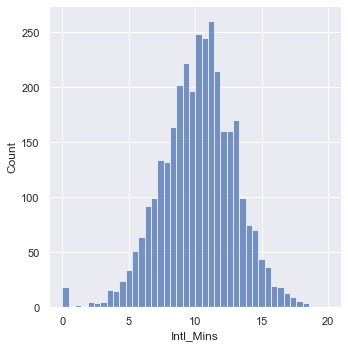

In [14]:
feats = ['Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins']

for feat in feats:
    _ = sns.displot(df[feat])
    plt.show()

#### All of these features appear to be well approximated by the normal distribution. If this were not the case, we would have to consider applying a feature transformation of some kind.

##### We've already seen that there's not much of a difference in account lengths between churners and non-churners, but that there is, in fact, a difference in the number of customer service calls left by churners.

##### Let's now visualize this difference using a box plot and incorporate other features of interest - do customers who have international plans make more customer service calls? Or do they tend to churn more? How about voicemail plans?  etc etc

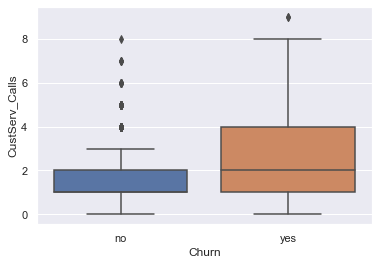

In [15]:
sns.boxplot(x = 'Churn',
          y = 'CustServ_Calls',
          data = df)
plt.show()

There is a very noticeable difference here between churners and non-churners, let's see how boxplots look without outliers:

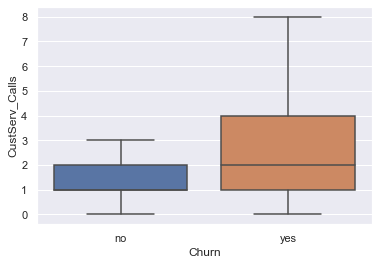

In [16]:
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = df,
            sym = "")
plt.show()

#### let's see whether or not having a voice mail plan affects the number of customer service calls or churn.

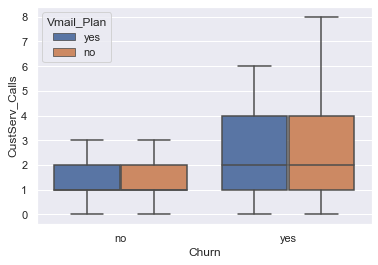

In [17]:
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = df,
            sym = "",
            hue = "Vmail_Plan")
plt.show()

Not much of a difference there. let's check 'Intl_Plan' instead.

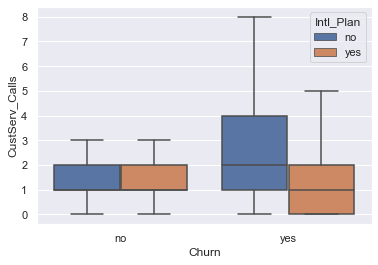

In [18]:
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = df,
            sym = "",
            hue = "Intl_Plan")
plt.show()

#### There are some very interesting insights here. It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls.

## Preprocessing for Churn Modeling

let's at first perform feture engineering, scale numerical features and then encode binary features

### Feature Engineering

In [19]:
df.corr()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Day_Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,-0.009646
Day_Charge,0.006214,0.000776,1.000000,0.007050,0.004324,-0.010157,-0.013427,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094,-0.008264
Eve_Calls,0.019260,-0.005864,0.015769,-0.011430,-0.002093,0.008703,0.002423,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674,-0.011886


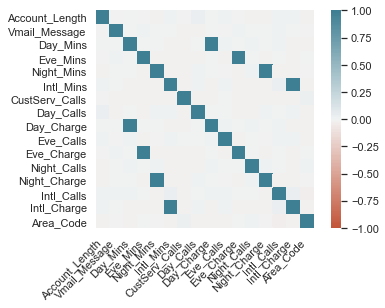

In [20]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

##### It is clear that Day Minutes, Evening Minutes, Night Minutes, and International Minutes are highly correlated with Day Charge, Evening Charge, Night Charge, and International Charge, respectively. Intuitively, it makes sense that these features should be correlated, and from a modeling standpoint, we can improve the performance of our models by removing these redundant features. 

Unique identifiers such as 'Area_Code' and 'Phone' are obviously not useful when it comes to predicting customer churn, therefore we dan drop them

In [21]:
df = df.drop(df[['Area_Code','Phone']], axis=1)
print(df.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')


In [22]:
df['Avg_Night_Calls'] = df['Night_Mins'] / df['Night_Calls']
print(df['Avg_Night_Calls'].head())

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account_Length   3333 non-null   int64  
 1   Vmail_Message    3333 non-null   int64  
 2   Day_Mins         3333 non-null   float64
 3   Eve_Mins         3333 non-null   float64
 4   Night_Mins       3333 non-null   float64
 5   Intl_Mins        3333 non-null   float64
 6   CustServ_Calls   3333 non-null   int64  
 7   Churn            3333 non-null   object 
 8   Intl_Plan        3333 non-null   object 
 9   Vmail_Plan       3333 non-null   object 
 10  Day_Calls        3333 non-null   int64  
 11  Day_Charge       3333 non-null   float64
 12  Eve_Calls        3333 non-null   int64  
 13  Eve_Charge       3333 non-null   float64
 14  Night_Calls      3333 non-null   int64  
 15  Night_Charge     3333 non-null   float64
 16  Intl_Calls       3333 non-null   int64  
 17  Intl_Charge   

In [24]:
for col in ['Vmail_Plan', 'Churn']:
    df[col] = df[col].replace({'no':0, 'yes':1})
    
print(df['Vmail_Plan'].head())
print(df['Churn'].head())

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


In [25]:
df_state = pd.get_dummies(df, drop_first=True)
print(df_state.head())
print(df_state.columns)
print(df_state.shape)

   Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  Intl_Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ_Calls  Churn  Vmail_Plan  Day_Calls  ...  State_SD  State_TN  \
0               1      0           1        110  ...         0         0   
1               1      0           1        123  ...         0         0   
2               0      0           0        114  ...         0         0   
3               2      0           0         71  ...         0         0   
4               3      0           0        113  ...         0         0   

   State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  State

#### Adjusting feature scale

In [51]:
y = df_state['Churn']
df_state = df_state.drop('Churn', axis=1)

In [52]:
scaled = StandardScaler().fit_transform(df_state)
df_scaled = pd.DataFrame(scaled, columns=df_state.columns)
# Add column names back for readability
# dfn = pd.DataFrame(df_scaled, columns=["Intl_Calls", "Night_Mins"])
print(df_scaled.shape)


(3333, 68)


In [53]:
df_scaled.info()
df_scaled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 68 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account_Length   3333 non-null   float64
 1   Vmail_Message    3333 non-null   float64
 2   Day_Mins         3333 non-null   float64
 3   Eve_Mins         3333 non-null   float64
 4   Night_Mins       3333 non-null   float64
 5   Intl_Mins        3333 non-null   float64
 6   CustServ_Calls   3333 non-null   float64
 7   Vmail_Plan       3333 non-null   float64
 8   Day_Calls        3333 non-null   float64
 9   Day_Charge       3333 non-null   float64
 10  Eve_Calls        3333 non-null   float64
 11  Eve_Charge       3333 non-null   float64
 12  Night_Calls      3333 non-null   float64
 13  Night_Charge     3333 non-null   float64
 14  Intl_Calls       3333 non-null   float64
 15  Intl_Charge      3333 non-null   float64
 16  Avg_Night_Calls  3333 non-null   float64
 17  Intl_Plan_yes 

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Vmail_Plan,Day_Calls,Day_Charge,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0.676489,1.234883,1.566767,-0.070610,0.866743,-0.085008,-0.427932,1.617086,0.476643,1.567036,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
1,0.149065,1.307948,-0.333738,-0.108080,1.058571,1.240482,-0.427932,1.617086,1.124503,-0.334013,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
2,0.902529,-0.591760,1.168304,-1.573383,-0.756869,0.703121,-1.188218,-0.618396,0.675985,1.168464,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
3,-0.428590,-0.591760,2.196596,-2.742865,-0.078551,-1.303026,0.332354,-0.618396,-1.466936,2.196759,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781
4,-0.654629,-0.591760,-0.240090,-1.038932,-0.276311,-0.049184,1.092641,-0.618396,0.626149,-0.240041,...,-0.135395,-0.127116,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781


In [55]:
features = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']
target = ['Churn']

X = df_scaled

y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [56]:
#X_train, X_test, y_train, y_test = train_test_split(df_scaled[features], df_scaled[target], test_size = 0.3, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [57]:
print(X_train.shape)
print(y_train.dtypes)
y_train = y_train.astype('int')
print(y_train.dtypes)

y_test = y_test.astype('int')

(2333, 68)
int64
int64


In [58]:
X_test.shape

(1000, 68)

In [59]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Compute accuracy
print('Model accuracy score is: ')
print(clf.score(X_test, y_test))

Model accuracy score is: 
0.94


#### Confusion matrix

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[855   2]
 [ 58  85]]


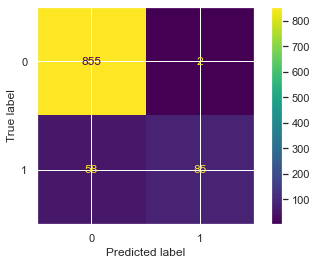

In [61]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

In [67]:
from sklearn.metrics import precision_score, recall_score

print('Precision score: ')
print(precision_score(y_test, y_pred))
print('\n')

print('Recall score: ')
print(recall_score(y_test, y_pred))

Precision score: 
0.9770114942528736


Recall score: 
0.5944055944055944


#### Other metrics

##### ROC Curve

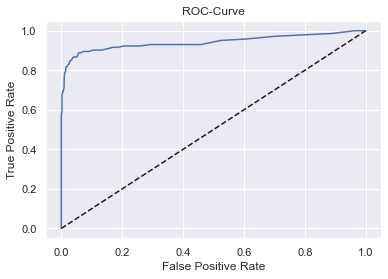

In [76]:
from sklearn.metrics import roc_curve

y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)

# labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC-Curve')
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [78]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_prob))

0.9417875007139885


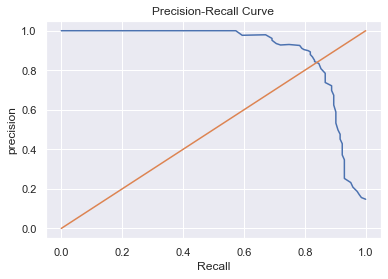

In [75]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision)

plt.xlabel("Recall")
plt.ylabel("precision")
plt.title('Precision-Recall Curve')
plt.plot([0, 1], [0, 1])
plt.show()

#### F1 score

There's obviously a tradeoff between precision and recall. Both are important metrics, and depending on how the business is trying to model churn, one may want to focus on optimizing one over the other. Often, however, it is handy to employ a single metric that can quantify model performance. The AUC is one metric one can use in these cases, and another is the F1 score:

In [77]:
from sklearn.metrics import f1_score

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f1_score(y_test, y_pred))

0.711111111111111


## Further tuning Churn-Prediction model

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2']}
grid_search = GridSearchCV(clf, param_grid)
grid_search.fit(X, y)

print(grid_search.best_params_)

{'max_features': 'auto'}


In [80]:
param_grid = {"max_depth": [3, None], #Quality of Split
              "max_features": [1, 3, 10],  #Number of features for best split
              "bootstrap": [True, False],  #Max depth of tree
              "criterion": ["gini", "entropy"]}  #Whether Bootstrap samples are used

grid_search = GridSearchCV(clf, param_grid)
grid_search.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10]})

In [81]:
print(grid_search.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10}


#### Let's also implement randomized search

In [137]:
from sklearn.model_selection import RandomizedSearchCV
import random

param_dist = {"max_depth": [3, None],
              "max_features": np.arange(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

random_search = RandomizedSearchCV(clf, param_dist)

random_search.fit(X, y)
print(random_search.best_params_)

{'max_features': 10, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}


### Assessing feature significances for churn outcome prediction

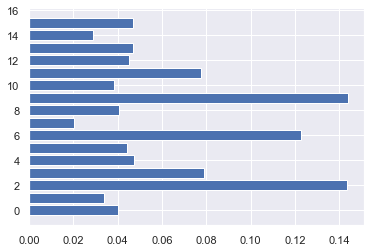

In [138]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

importances = clf.feature_importances_

plt.barh(range(X.shape[1]), importances)
plt.show()

##### let's re-order the bars in ascending order and add labels for better interpretability

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

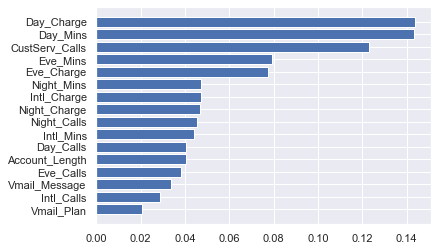

In [140]:
importances = clf.feature_importances_
sorted_index = np.argsort(importances)

labels = X.columns[sorted_index][0:16]
plt.clf()
plt.barh(range(0,16), importances[sorted_index][0:16], tick_label=labels)
plt.show()

#### seems like CustServ_Calls, Day_Mins and Day_Charge are the most important drivers of churn.